# Gym churn project 

The gym chain Model Fitness is developing a customer interaction strategy based on our analytical data.
One of the most common problems gyms and other services face is customer churn. 
Our goal is to use basics of ML to predict the churn rate next month . 
Therefore we will use the suitable algorithm and train our data for our pridiction .

In [32]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, balanced_accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# 1. EDA

##  openning data

In [3]:
gym = pd.read_csv('gym_churn_us.csv')
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym.columns = gym.columns.str.lower()

In [5]:
gym.tail()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [6]:
gym.sample(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
1407,0,1,0,0,1,1,1,29,163.454588,1.0,2,2.366660,2.381380,0
2369,1,1,1,1,0,6,0,27,274.084763,6.0,8,1.895461,1.722015,0
2362,0,1,1,1,0,1,0,28,180.249828,1.0,5,2.722991,2.716433,0
3071,0,1,0,0,1,1,1,33,222.131991,1.0,2,3.794331,3.734833,0
466,1,0,0,0,1,1,0,29,183.530260,1.0,6,0.669882,0.703963,0


In [7]:
gym.shape

(4000, 14)

It seems that our data is high quality and large enough to make models on it.

## data type and missing values 

In [8]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [9]:
bool_col = (['gender', 'near_location', 'partner', 
             'promo_friends', 'phone', 'group_visits', 'churn'])

for i in bool_col:
    gym[i] = gym[i].astype('uint8')
    
gym.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   uint8  
 1   near_location                      4000 non-null   uint8  
 2   partner                            4000 non-null   uint8  
 3   promo_friends                      4000 non-null   uint8  
 4   phone                              4000 non-null   uint8  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   uint8  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

no nulls. no categorical values. 

## mean std and percentages of data 

In [10]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [11]:
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


On average, those who tend to leave are new members and their visits are less frequent from those who stayed at the gym.

## Distribution plots 

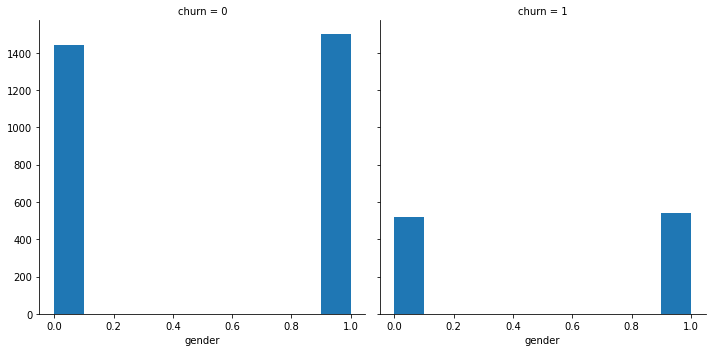

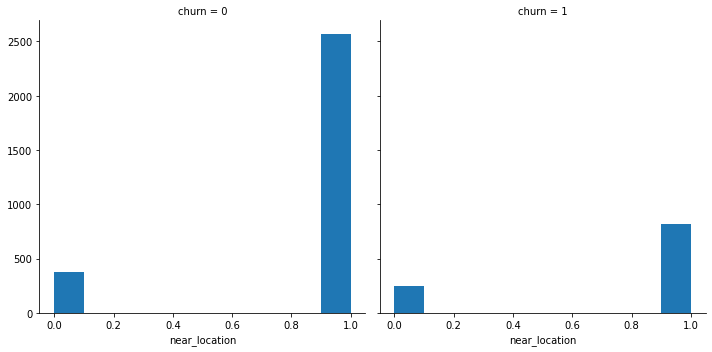

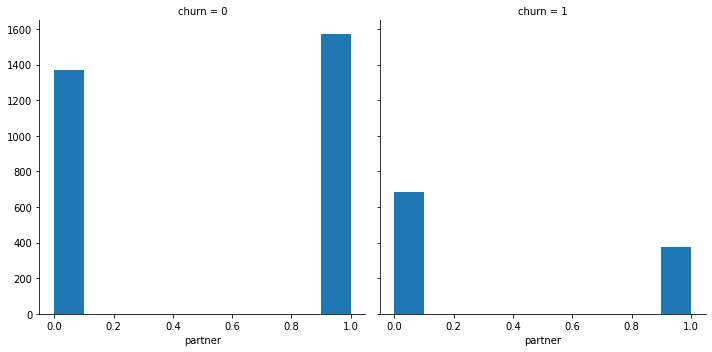

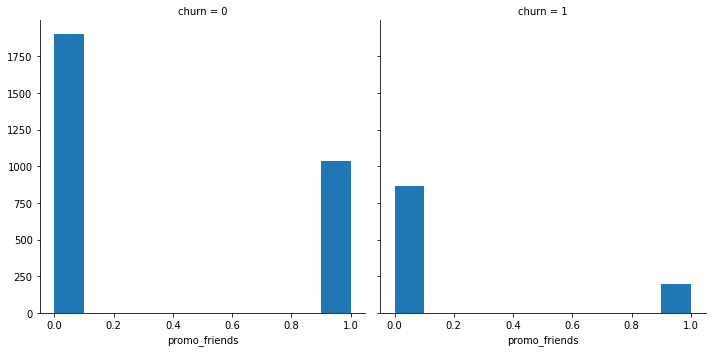

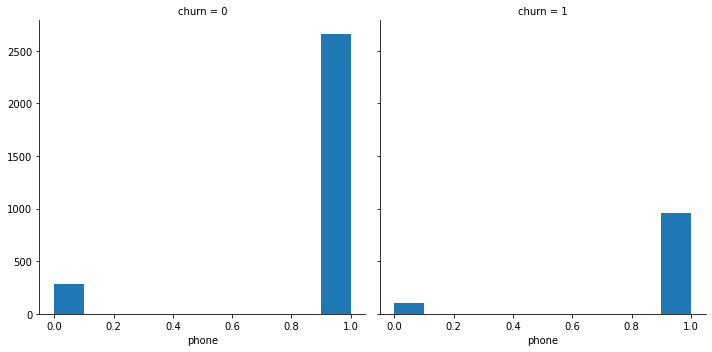

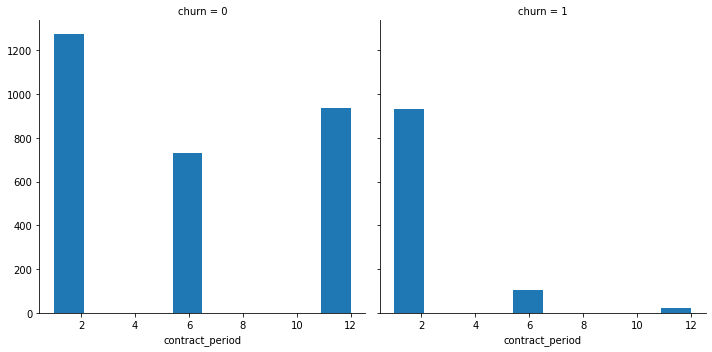

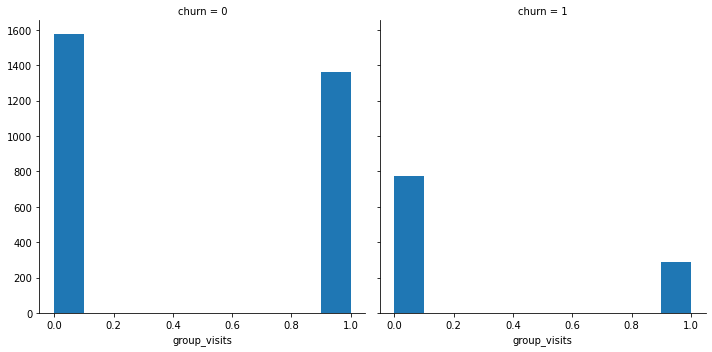

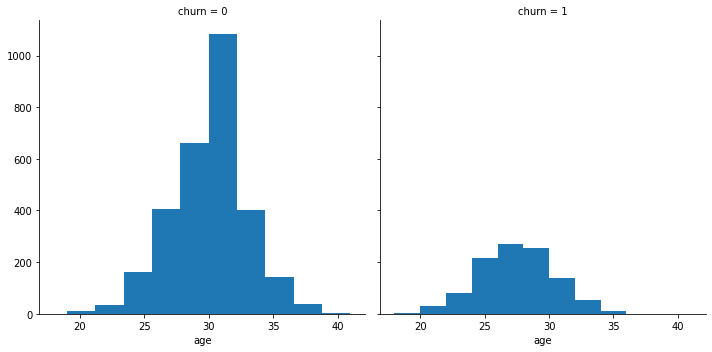

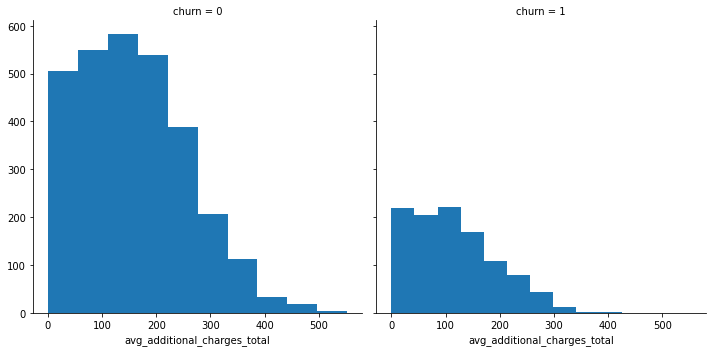

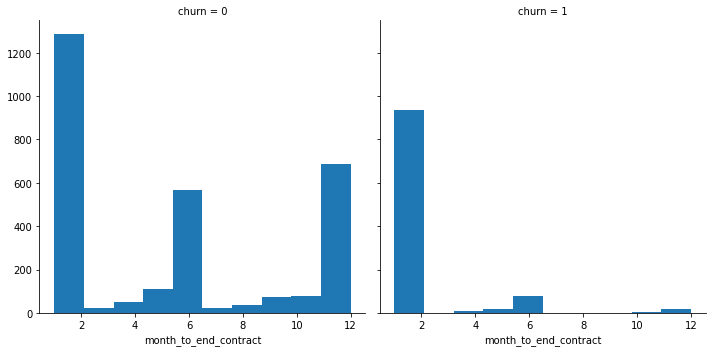

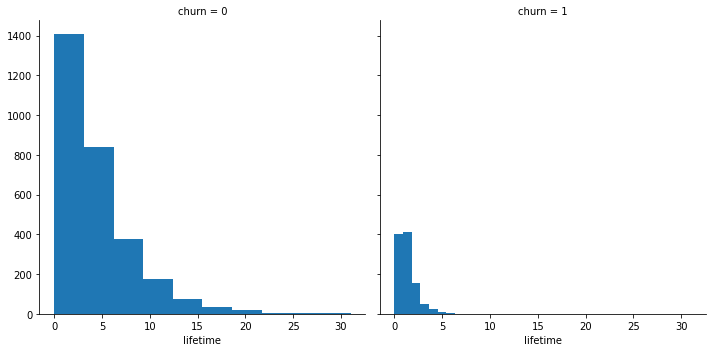

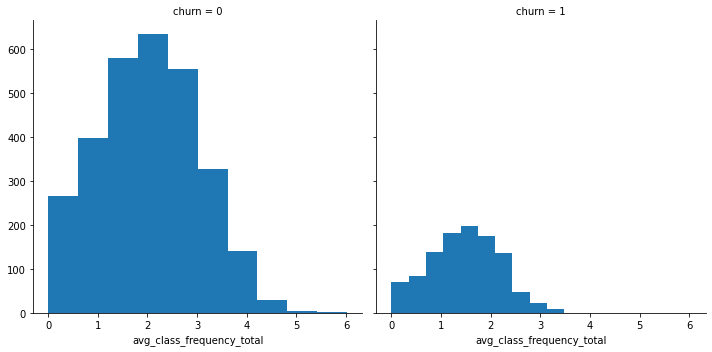

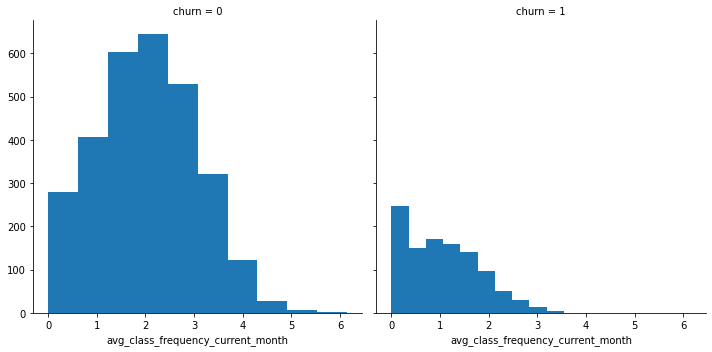

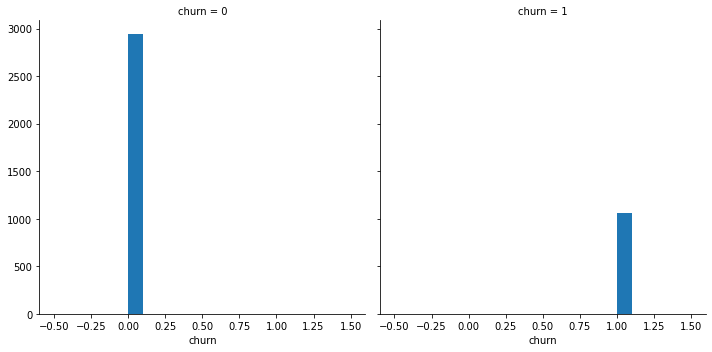

In [12]:
for clmn in gym.columns:    
    g = sns.FacetGrid(gym, col='churn', height=5)
    g.map(plt.hist, clmn)

Our data isn't balanced. We need to take it into account when we will make calculation .

## correlation 

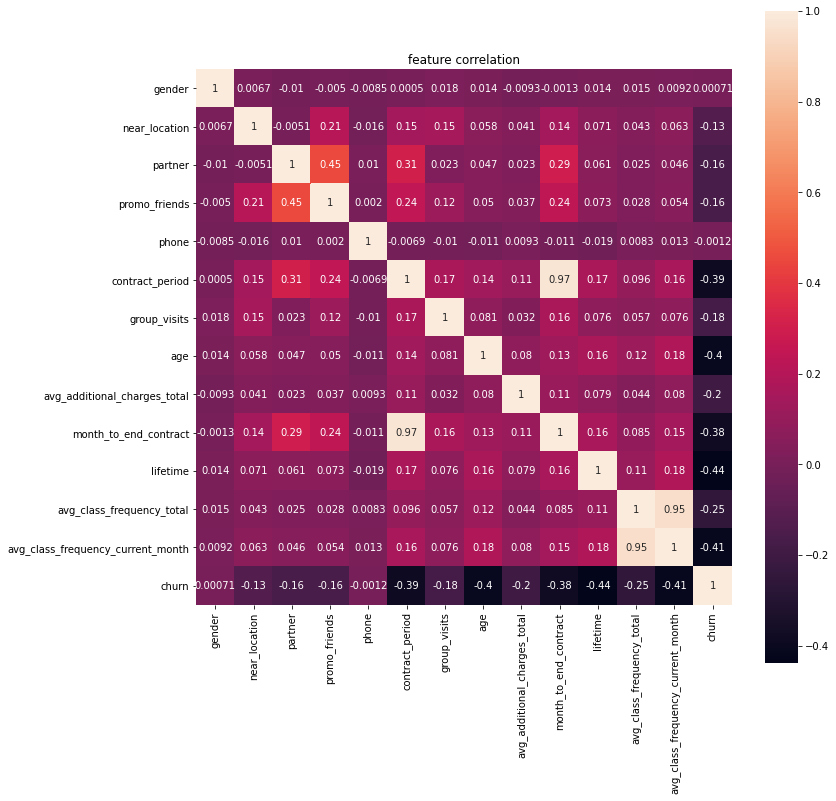

In [13]:
correlation = gym.corr() 
plt.figure(figsize=(12,12))

sns.heatmap(correlation, annot = True, square=True)
plt.title('feature correlation')


plt.show()

* The high correlation values are quite logical: conract period&month to and contract and average class total&average class month. 
* For the rest values, no high correlation found

In [14]:
gym = gym.drop(['contract_period','avg_class_frequency_current_month'], axis=1)

We created distribution plot to each feature splited by churn:

* The churn feature isn't balanced
* The average age of customers who leave is smaller than those who do not leave
* Customers who tend to leave have a shorter contract
* Leaving customers spend less on additional payments.

We made a correlation chart to display the relationship between features. 
* We dropped the features with high correlation 



# 2. Build a model to predict user churn

In [15]:
# dividind data into x-features and y-target var
x = gym.drop('churn', axis=1)
y = gym['churn']

In [16]:
# divide data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [17]:
# prediction function and evaluation of the bet model with confusion matrix
def prediction(m, x_train, y_train, x_test, y_test):
    model = m
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    (print('accuracy:{:.2f} precision:{:.2f} recall :{:.2f} '
           .format(balanced_accuracy_score(y_test, y_pred), 
                   precision_score(y_test, y_pred), 
                   recall_score(y_test, y_pred)))
    )

Our data is imbalanced so we cannot use the accuracy metrix. Instead we will use the balanced_accuracy_score.

In [18]:
# RandomForestClassifier
prediction(RandomForestClassifier(random_state = 0), x_train, y_train, x_test, y_test)

accuracy:0.87 precision:0.84 recall :0.80 


In [19]:
# LogisticRegression
prediction(LogisticRegression(random_state = 0), x_train, y_train, x_test, y_test)

accuracy:0.87 precision:0.81 recall :0.81 


The model operated with logistic regression showed better results in compere with random forest model . 

In [20]:
# prediction with logistic regression 
model_chosen = LogisticRegression()

# train
model_chosen.fit(x_train, y_train) 

# forecasts
predictions = model_chosen.predict(x_test) 
#print(model_chosen.score(x,y))

In [21]:
#print(model_chosen.coef_ )

In [22]:
#print(model_chosen.predict_proba(x_test)[:,1]) 


# Create user clusters

##  hierarchical clustering

In [23]:
# Agglomerative hierarchical clustering

#standardization
sc = StandardScaler()
x_sc = sc.fit_transform(x)

linked = linkage(x_sc, method = 'ward') 


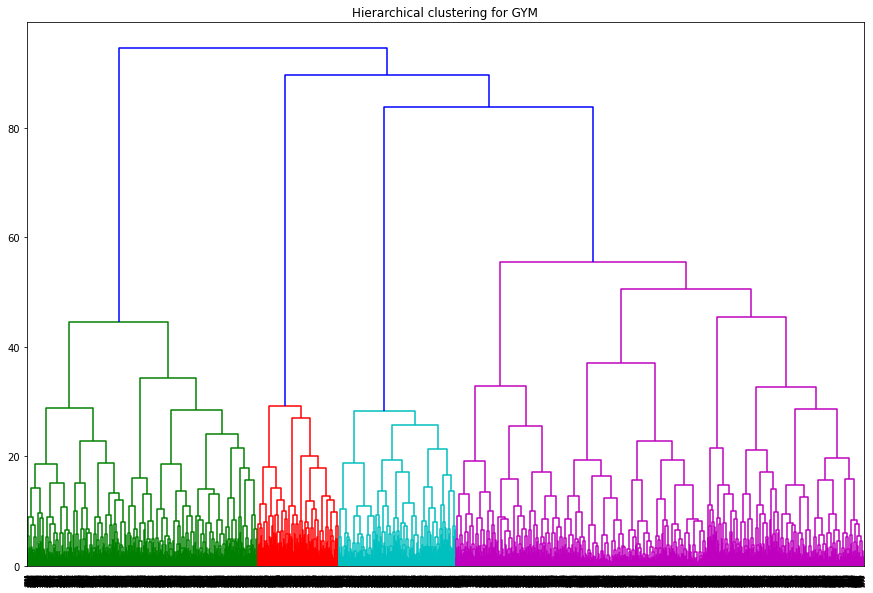

In [24]:
# dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

The suggested optimal number of clusters is 4 .

## Kmeans 

In [25]:
#kmeans
# n_clusters = 4 as we saw at the previous chart.
km = KMeans(n_clusters = 4) 
labels = km.fit_predict(x_sc)

In [26]:
from sklearn.metrics import silhouette_score
silhouette_score(x_sc, labels)

0.1261632446169451

In [27]:
# We have 4 clusters . The values calculated by their distance.
# adding cluster number of each observation to gym table - adding column
gym['cluster_km'] = labels
gym.head()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn,cluster_km
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.020398,0,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.922936,0,2
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.859098,0,1
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.205633,0,3
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,0,3


## Mean features values 

In [28]:
# mean feature values per cluster
gym_by_cluster = gym.groupby(['cluster_km']).mean()
gym_by_cluster.head()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839
1,0.504498,0.662669,0.294603,0.034483,1.0,0.197901,27.575712,119.643112,1.843328,1.995502,1.526673,0.569715
2,0.518092,0.934211,0.371711,0.004934,1.0,0.554276,30.630757,174.051146,5.499178,5.140625,2.219128,0.042763
3,0.503759,0.966165,0.864662,1.000000,1.0,0.513158,29.506579,151.184633,6.034774,4.196429,1.941083,0.137218


* After grouping the data by clusters we see that the groups are ordered by the churn rate in ascending order . (Group 0 with the lowest mean rate and group 3 with the highest rate)
* The group with the highest churn, has the shortest contract and at the end of it . 

## distributions plot

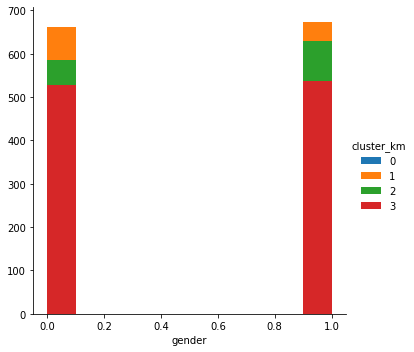

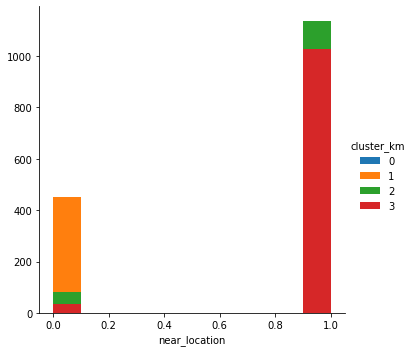

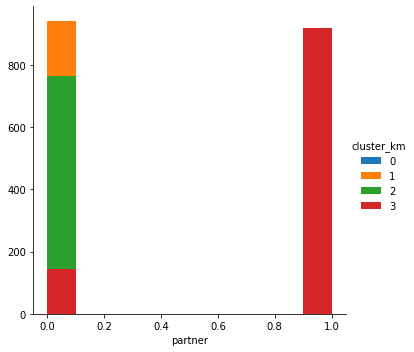

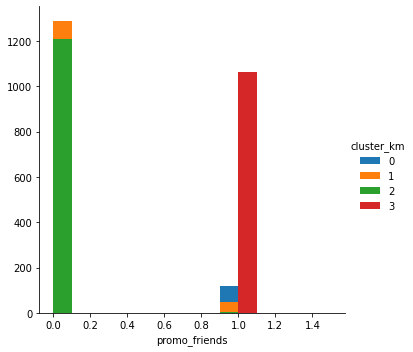

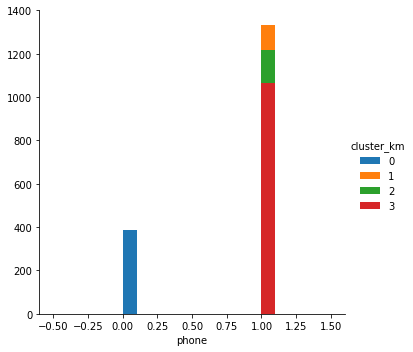

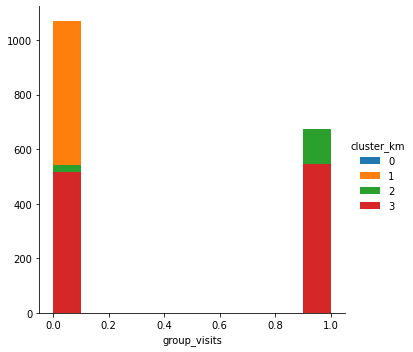

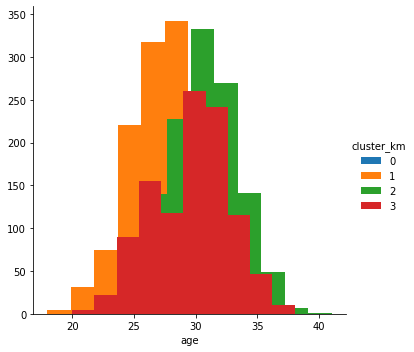

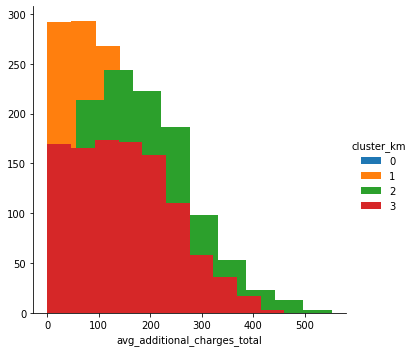

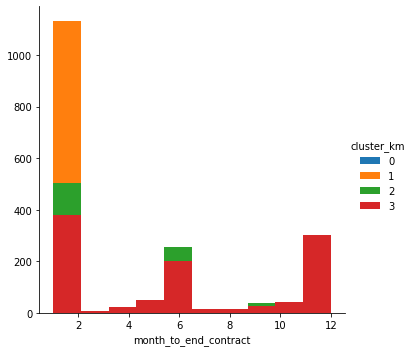

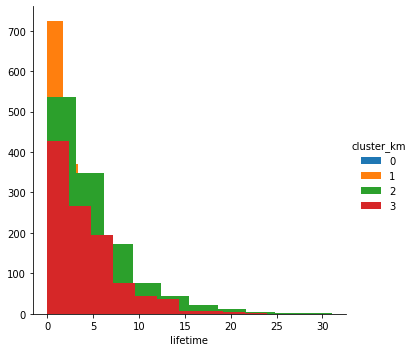

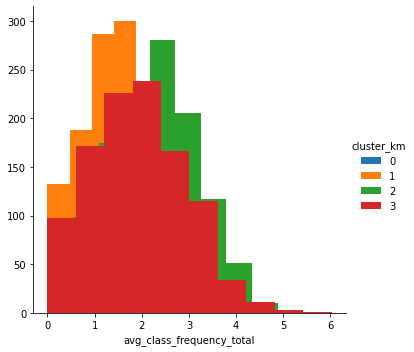

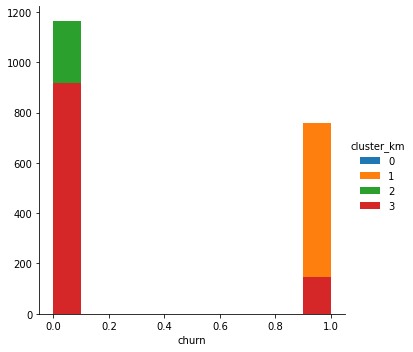

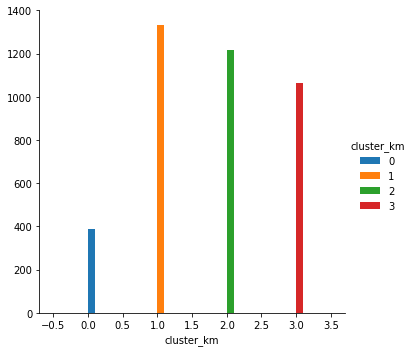

In [29]:
for clmn in gym.columns:    
    g = sns.FacetGrid(gym, hue='cluster_km', height=5)
    g.map(plt.hist, clmn)
    g.add_legend()

<AxesSubplot:xlabel='gender', ylabel='Count'>

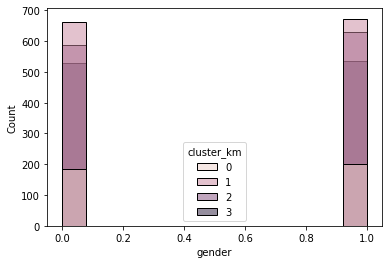

In [30]:
sns.histplot(gym, x = 'gender', hue='cluster_km')

## Churn rate for each cluster 

In [31]:
# difference churn rate by clusters
gym_by_cluster['churn_100'] = gym_by_cluster['churn'] * 100
gym_by_cluster['churn_100']

cluster_km
0    26.683938
1    56.971514
2     4.276316
3    13.721805
Name: churn_100, dtype: float64

Group No. 1 consists of customers who tend to leave the gym compared to group No. 3 who do not tend to leave. 

# Conclusion

* We made a ready train algorithm to predict new data. 
* Our logistic regression model got high score when we evaluated it.(accuracy:0.91 precision:0.90 recall :0.85 )
* By spliting the data into clusters we see the difference between the churn of each group . Each group we could treat differentry to reduce abandonment.